# Algoritmos de Clasificación: Árboles de Decisión

Los árboles de decisión son un tipo de algoritmo de aprendizaje supervisado que se utiliza principalmente en los problemas de clasificación. Funciona tanto para variables categóricas como continuas de entrada y salida. En esta técnica, dividimos la población o muestra en dos o más conjuntos homogéneos (o subpoblaciones) basados en el más significativo divisor / diferenciador en los atributos de entrada.

## Características

+ No paramétrico: sin parámetros, sin supuestos de distribución
+ Jerárquico: consiste en una secuencia de preguntas que dan una etiqueta de clase cuando se aplica a cualquier registro
+ Variable Size: Cualquier función booleana puede ser representada
+ Determinista: Para el mismo conjunto de características el árbol asignará la misma etiqueta
+ Parámetros discretos y continuos

## Árbol de Decisión para el conjunto de datos de Jugar Tenis

Conjunto de datos del problema

<img src="figuras/JugarTenis.png" width="75%">

Posible árbol de decisión para este problema

<img src="figuras/ArbolDecision.png" width="75%">

El ejemplo anterior muestra la tabla de ejemplos de las condiciones meteorológicas y la posibilidad de jugar al tenis o no. El árbol muestra un posible resultado del aprendizaje para poder tomar decisiones para esta tarea de decidir si jugamos o no. Se observa que el árbol está formado únicamente por los nodos amarillos (nodos de decisión) y los de color morado (nodos de respuesta), mientras que los rectángulos azules claro son simplemente las etiquetas de las ramas de salida de cada nodo de decisión.

## Construir un Árbol de Decisión

Para construir un árbol de decisión, una posibilidad sería evaluar todos los árboles de decisión posibles (por ejemplo, todas las permutaciones de las condiciones de prueba) para un conjunto de datos dado. Pero esto es generalmente demasiado complejo para ser práctico: complejidad $ \rightarrow O(2^n)$.

Podemos encontrar una solución práctica que funcione, utilizando un algoritmo ** heurístico**.

El método básico utilizado para construir (o "crecer") un árbol de decisión es el algoritmo de Hunt.
Hunt es un algoritmo recursivo avaro que conduce a un óptimo local. Construye un árbol de decisión dividiendo recursivamente los ejemplos en subconjuntos más pequeños y más pequeños.

- codicioso - el algoritmo toma la decisión localmente óptima en cada paso
- recursivo - divide la tarea en subtareas, resuelve cada uno de la misma manera
- óptimo local - solución para un determinado número de puntos adyacentes

La decisión de partición se realiza en cada nodo de acuerdo con una métrica llamada pureza. Una partición es 100% pura cuando todos sus registros pertenecen a una sola clase. Sea $D_t$ el conjunto de ejemplos de entrenamiento que alcanzan un nodo $t$. El procedimiento recursivo general se define a continuación:

* Si $D_t$ sólo contiene ejemplos que pertenecen a la misma clase $y_t$, entonces $t$ es un nodo hoja etiquetado como $y_t$
* Si $D_t$ es un conjunto vacío, entonces $t$ es un nodo hoja etiquetado con la clase por defecto, $y_d$
* Si $D_t$ contiene ejemplos que pertenecen a más de una clase, utilice un atributo para dividir los datos en subconjuntos más pequeños.

Recursivamente aplica el procedimiento a cada subconjunto hasta que todos los ejemplos del subconjunto pertenezcan a la misma clase. El algoritmo de Hunt supone que cada combinación de conjuntos de atributos tiene una etiqueta de clase única durante el procedimiento. Si todos los registros asociados con $D_t$ tienen valores de atributo idénticos excepto para la etiqueta de clase, entonces no es posible dividir estos registros más. En este caso, el nodo se declara como un nodo hoja con la misma etiqueta de clase que la clase mayoritaria de registros de formación asociados con este nodo.

Basado en los atributos del conjunto de entrenamiento, el modelo de árbol de decisión aprende una serie de
preguntas para inferir las etiquetas de clase de los ejemplos. Aunque la figura anterior ilustra el concepto de un árbol de decisiones basado en variables categóricas,esto también funciona si los atributos son números reales como
en el conjunto de datos Iris. Por ejemplo, se podría simplemente definir un valor de corte sobre el atributo ancho del sepalo y hacer una pregunta binaria. "¿Es el ancho del sepalo ≥ 2.8 cm?"

Usando el algoritmo de decisión, comenzamos en la raíz del árbol y dividimos los datos en el atributo que da como resultado la mayor ganancia de información (IG), que se explicará más adelante. En un proceso iterativo, podemos repetir este procedimiento de división en cada nodo hijo hasta que los nodos hojas sean puras. Esto significa que todos los ejemplos en cada nodo pertenecen a la misma clase. En la práctica, esto puede generar a un árbol muy profundo con muchos nodos, que puede conducir fácilmente a un sobreajuste. Por lo que, típicamente
se quiere podar el árbol estableciendo un límite para la profundidad máxima del árbol.

## Pureza

La parte más difícil de construir el árbol es seleccionar el atributo que produzca la mejor división. Hay tres medidas comunes de impureza usadas para medir la mejor división. Puesto que el objetivo de un árbol de decisión es tener nodos que consisten enteramente de miembros de una sola clase, la impureza de un nodo es la medida en que no es el caso. Por ejemplo, un nodo con 2 miembros de una clase y 0 miembros de otra clase tiene cero impurezas. Un nodo con 1 miembro de una clase, y uno de otro, sin embargo, tiene la impureza más alta. Las tres medidas más comunes de la impureza son entropía, impureza de gini y error de clasificación. Se definen usando las siguientes ecuaciones, donde $p(i|t)$ denota la fracción de registros que pertenecen a la clase $i$ en un nodo dado $t$, y $c$ es el número de clases:

$$Entropia(t)=-\sum\limits_{i=0}^{c-1}p(i|t)\log_{2} p(i|t)$$

$$Gini(t)=1-\sum\limits_{i=0}^{c-1} [p(i|t)]^2$$

$$Error\ Clasificación(t)=1-\max_{i}[p(i|t)]$$

## Maximizar la ganancia de información

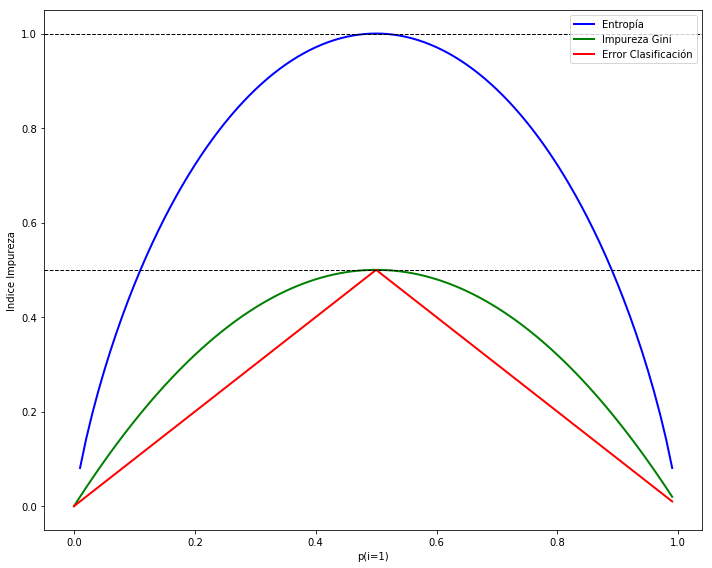

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import numpy as np


def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropia(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropia(p) if p != 0 else None for p in x]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x), err], 
                          ['Entropía', 
                           'Impureza Gini', 'Error Clasificación'],
                          ['-', '-', '-'],
                          ['blue', 'green', 'red']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper right')

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.ylabel('Indice Impureza')
plt.tight_layout()
plt.show()

La ecuación para la ganancia de información es:

$$\Delta = I(parent) - \sum\limits_{j=1}^k \frac{N(v_j)}{N}I(v_j)$$

Donde $I(⋅)$ es la medida de impureza de un nodo dado, $N$ es el número total de registros en el padre del nodo dado, $k$ es el número de valores de atributo, y $N(v_j)$ es el número de registros asociados con el nodo hijo, $v_j$.

## Procedimiento para seleccionar el mejor atributo usando Entropía

La entropía mide que tan homogéneos son los ejemplos de los que queremos aprender con respecto a la clasificación:

- Una muestra completamente homogénea (es decir, en la que todos se clasifican igual) tiene incertidumbre mínima, es decir, no tenemos dudas de cuál es la clasificación de cualquiera de sus elementos (si elegimos al azar cualquier de ellos, sabremos qué resultado tendremos). En este caso, fijaremos la incertidumbre (entropía) a 0

- Una muestra igualmente distribuida, es decir, que tiene el mismo número de ejemplos de cada posible clasificación, muestra una incertidumbre máxima, en el sentido de que es la peor situación para poder saber a priori cuál sería la clasificación de unos de sus ejemplos elegido al azar. Así pues, en este caso fijaremos la incertidumbre (entropía) a 1

En el ejemplo de la clasificación de si se juega tenis o no, la entropía que tiene el sistema con respecto a la clasificación es la siguiente:

$$numero\ de\ si = 9$$

$$numero\ de\ no = 5$$

$$total\ de\ ejemplos = 14$$

$$Entropia(t)=-\sum\limits_{i=0}^{c-1}p(i|t)\log_{2} p(i|t)$$

$$Entropia(JugarTenis) = Entropia(5, 9) 
                       = Entropia(5/14, 9/14)
                       = Entropia(0,36, 0,64)
                       = -(0,36 log_2 0,36) -(0,64 log_2 0,64)
                       = 0,94$$

Una vez definida matemáticamente la incertidumbre, entropía, tenemos más fácil entender qué es la información. Decimos que tenemos información acerca de un sistema cuando estamos más alejados de la incertidumbre, por tanto, la ganancia de información consiste en un decremento de la entropía del sistema. En nuesto caso, cuando dividimos el conjunto de datos respecto a los valores de cualquiera de los atributos conseguimos que la entropía del sistema disminuya.

¿Qué atributo crea las ramas más homogéneas y, por tanto, proporciona una ganancia de información mayor? Respondiendo a esta pregunta obtendríamos cuál sería la mejor pregunta posible en un determinado momento, para ello:
- Se calcula la entropía del total.
- Se divide el conjunto de datos en función de los diferentes atributos.
- Se calcula la entropía de cada rama y se suman proporcionalmente las ramas para calcular la entropía del total:

$$Entropia(T, X) = \sum\limits_{c∈X}p(c)Entropia(S_c)$$

- Se resta este resultado de la entropía original, obteniendo como resultado la Ganancia de Información (descenso de entropía) usando este atributo.

$$Ganancia\ Información(T,X)=Entropia(T)-Entropia(T,X)$$

- El atributo con mayor Ganancia es selecciona como nodo de decisión.

Una rama con entropía 0 se convierte en una hoja (nodo-respuesta), ya que representa una muestra completamente homogénea, en la que todos los ejemplos tienen la misma clasificación. Si no es así, la rama debe seguir subdividiéndose con el fin de clasificar mejor sus nodos.

Calculo de la Entropía para cada uno de los atributos:

- Calculemos la entropía que obtendríamos si hicieramos una división usando el primer atributo (Clima):

$$Entropia(JugarTenis, Clima) = p(Soleado)*Entropia(3,2) + p(Nublado)*Entropia(4,0) + p(Lluvia)*Entropia(3,2)$$
$$= (5/14)*0,971 + (4/14)*0,0 + (5/14)*0,971$$
$$= 0,693$$

- Calculemos la entropía que obtendríamos si hicieramos una división usando el segundo atributo (Temperatura):

$$Entropia(JugarTenis, Temperatura) = p(Alta)*Entropia(2,2) + p(Media)*Entropia(4,2) + p(Baja)*Entropia(3,1)$$
$$= (4/14)*1,0 + (6/14)*0,918 + (4/14)*0,811$$
$$= 0,911$$

- Calculemos la entropía que obtendríamos si hicieramos una división usando el tercer atributo (Humedad):

$$Entropia(JugarTenis, Humedad) = p(Alta)*Entropia(3,4) + p(Normal)*Entropia(6,1)$$
$$= (7/14)*0.985 + (7/14)*0,592$$
$$= 0,789$$

- Calculemos la entropía que obtendríamos si hicieramos una división usando el cuarto atributo (Viento):

$$Entropia(JugarTenis, Viento) = p(Fuerte)*Entropia(6,2) + p(Débil)*Entropia(3,3)$$
$$= (8/14)*0,811 + (6/14)*1.0$$
$$= 0,892$$

Posteriormente se calculan las ganacias de información para cada uno de los atributos:

- Calculamos la ganacia de información para el atributo Clima:

$$Ganancia\ Informacion = Entropia(JugarTenis) - Entropia(JugarTenis, Clima) = 0,94 - 0,693 = 0,247$$

- Calculamos la ganacia de información para el atributo Temperatura:

$$Ganancia\ Informacion = Entropia(JugarTenis) - Entropia(JugarTenis, Temperatura) = 0,94 - 0,911 = 0,029$$

- Calculamos la ganacia de información para el atributo Humedad:

$$Ganancia\ Informacion = Entropia(JugarTenis) - Entropia(JugarTenis, Humedad) = 0,94 - 0,789 = 0,152$$

- Calculamos la ganacia de información para el atributo Viento:

$$Ganancia\ Informacion = Entropia(JugarTenis) - Entropia(JugarTenis, Viento) = 0,94 - 0,892 = 0.048$$

Se selecciona el atributo que proporciona mayor ganancia (en este caso, Clima). 

A continuación nos situamos en cada uno de los subconjuntos de ejemplos que define cada valor del atributo seleccionado y repetimos el proceso, construyendo poco a poco el árbol completo de decisión. Un nodo que tenga entropía nula se convierte en un nodo respuesta, ya que representa una muestra homogénea en el que la clasificación final es la misma para todos los ejemplos que contiene.

## Prevención de Sobreajuste

Además de determinar las divisiones, también necesitamos un criterio de parada que indique cuando se termina. Por ejemplo, se puede detener cuando todos los ejemplos pertenecen a la misma clase, o cuando todos los ejemplos tienen los mismos atributos. Esto es correcto en principio, pero probablemente conduciría a un sobreajuste.
- Una posibilidad es la pre-poda, que implica establecer un umbral mínimo en la ganancia, y detenerse cuando ninguna división logra una ganancia por encima de este umbral. Esto evita el sobreajuste, pero es difícil de calibrar en la práctica (puede preservar el sesgo!)
- Alternativamente podríamos construir el árbol completo, y luego realizar la poda como un paso de post-procesamiento.
Para podar un árbol, examinamos los nodos desde abajo hacia arriba y simplificamos las piezas del árbol (de acuerdo con algunos criterios).
Los subárboles complicados se pueden reemplazar con un solo nodo o con un subárbol más simple (secundario).

## Ventajas y desventajas de los Árboles de Decisión

### Ventajas
+ Simple de entender e interpretar. Los árboles pueden ser visualizados.
+ Requiere poca preparación de datos (por ejemplo, no normalización de datos)
+ Capaz de manejar datos numéricos y categóricos.
+ Utiliza un modelo de caja blanca. Si una situación dada es observable en un modelo, la explicación de la condición se explica fácilmente por la lógica booleana. Por el contrario, en un modelo de caja negra (por ejemplo, en una red neuronal artificial), los resultados pueden ser más difíciles de interpretar.
+ Funciona bien cuando tienes muchos datos que no entiendes.

### Desventajas:
+ Sobreajuste
+ Inestable - pequeñas variaciones en los datos pueden dar lugar a grandes variaciones en el árbol
+ Encontrar el árbol de decisiones óptimo (es decir, el árbol más pequeño que minimiza el error de entrenamiento) es NP-duro, por lo que las heurísticas siempre se utilizan
+ Los datos desequilibrados conducen a árboles sesgados

## Construir un Árbol de Decisión con sklearn

Cargar conjunto de datos iris y crear conjuntos de entrenamineto y prueba

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import graficar_regiones_decision as grd

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)
arbol = DecisionTreeClassifier()
arbol.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(arbol.score(X_prueba, y_prueba)))

Exactitud: 0.978


Entrenar un clasificador tipo Árbol de Decisión con dos de los atributos y graficar regiones de decisión

Exactitud: 0.956


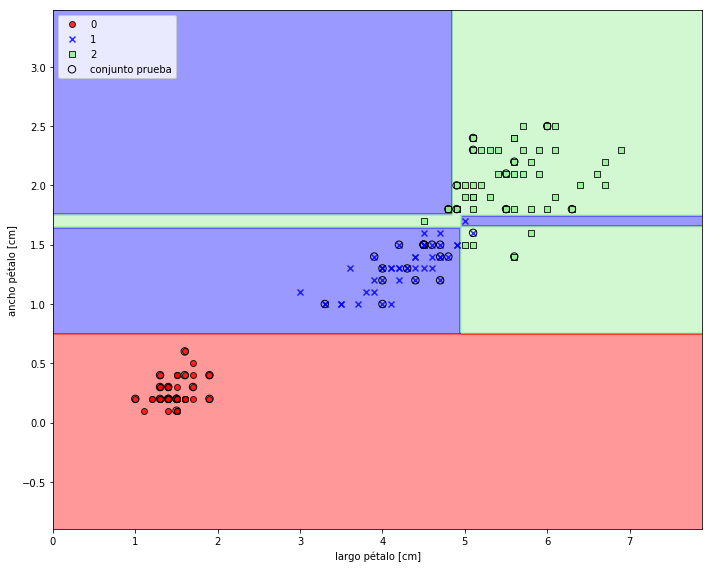

In [8]:
X1 = iris.data[:, [2, 3]]
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X1, y, test_size=0.3, random_state=0)
arbol = DecisionTreeClassifier(criterion='entropy')
arbol.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(arbol.score(X_prueba, y_prueba)))

X_combinado = np.vstack((X_entrenamiento, X_prueba))
y_combinado = np.hstack((y_entrenamiento, y_prueba))
grd.graficar_regiones_decision(X_combinado, y_combinado, 
                      clasificador=arbol, indices_prueba=range(105, 150))

plt.xlabel('largo pétalo [cm]')
plt.ylabel('ancho pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Aunque el concepto de "poda" no es tan claro en sklearn, podemos generalizar
modelo cambiando los valores predeterminados de `min_samples_leaf` y `max_depth`.

In [4]:
arbol.set_params(min_samples_leaf=4)
arbol.set_params(max_depth=3)

arbol.fit(X_entrenamiento, y_entrenamiento)
print("Exactitud: {:.3f}".format(arbol.score(X_prueba, y_prueba)))

Exactitud: 0.978


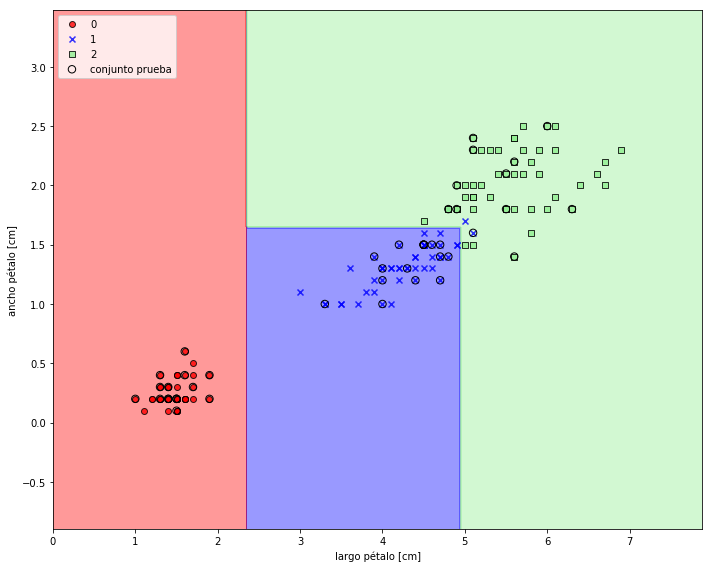

In [7]:
grd.graficar_regiones_decision(X_combinado, y_combinado, 
                      clasificador=arbol, indices_prueba=range(105, 150))

plt.xlabel('largo pétalo [cm]')
plt.ylabel('ancho pétalo [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Visualizar Arbol de Decisión

Para visualizar el Árbol de Decisión se debe instalar los siguientes paquetes:
```python
conda install python-graphviz
conda install pydotplus
```
Importar los paquetes necesarios:

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Crear el Árbol de Decisión

In [28]:
X = iris.data
y = iris.target
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=0)
arbol2 = DecisionTreeClassifier()
arbol2.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Visualizar el Árbol de Decisión con `criterion='gini'`

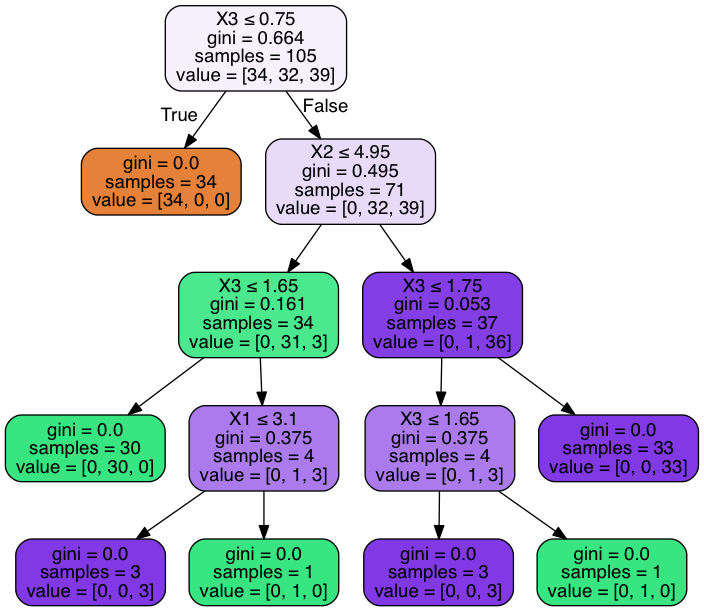

In [29]:
dot_data = StringIO()
export_graphviz(arbol2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

La fila 'value' en cada nodo nos dice cuántas de las observaciones que se clasificaron en ese nodo caen en cada una de las tres categorías. Se puede ver que el atributo X3, que es la longitud del pétalo, fue capaz de distinguir completamente una especie de flor (Iris-Setosa) del resto

#### Visualizar el Árbol de Decisión con `criterion='entropy'`

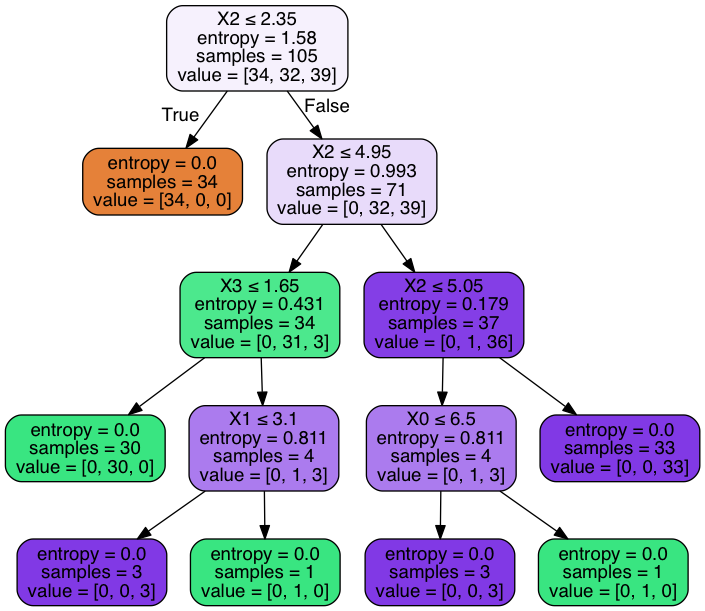

In [32]:
arbol3 = DecisionTreeClassifier(criterion='entropy')
arbol3.fit(X_entrenamiento, y_entrenamiento)
dot_data = StringIO()
export_graphviz(arbol3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())